In [10]:
import os
import logging
import numpy as np
from matplotlib import pyplot as plt
from photometry.NERSC.paths import *
from photometry import *
from photometry.utils import Binning

logger = logging.getLogger('EBV1000')
setup_logging()

run = 'north'
#run = 'south'
region = run[0].upper()
path_data = path_data(region)
path_randoms = path_randoms(region)
path_mctool = path_mctool(region)
path_legacysim = os.path.join(path_dir,'legacysim','dr9','ebv1000shaper',run,'file0_rs0_skip0','merged','matched_input.fits')

[ 000019.87 ]: 01-22 15:15  Catalogue       INFO     Loading catalogue /global/cscratch1/sd/adematti/legacysim/dr9/ebv1000shaper/north/file0_rs0_skip0/merged/matched_input.fits.
[ 000020.72 ]: 01-22 15:15  TargetSelection INFO     Selecting 123182/123182 targets.


correlation 0.5779427686242584


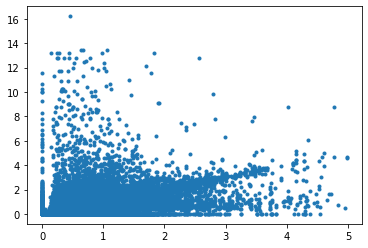

In [13]:
legacysim = TargetSelection.load_objects(path_legacysim,radecbox=None,tracer='ELG',region=None)
legacysim.set_upper_case()
mask = legacysim['MATCHED']
plt.scatter(legacysim['INPUT_SHAPE_R'][mask],legacysim['SHAPE_R'][mask],marker='.')
print('correlation',np.corrcoef(legacysim['INPUT_SHAPE_R'][mask],legacysim['SHAPE_R'][mask])[0,1])

In [72]:
from scipy import special,stats
def estimate_std_outliers(tab):
    # trick to estimate standard deviation in presence of outliers
    return np.median(np.abs(tab-np.median(tab)))/(2.**0.5*special.erfinv(1./2.))

def plot_hist(ax, legacysim, field, mask=None, xlabel=None, ylabel=None, divide_uncer=True, label_entries=True, label_mean_std=True, kwargs_xedges=None, kwargs_hist=None):
    kwargs_xedges = kwargs_xedges or {}
    kwargs_hist = {**{'histtype':'step','color':'k'},**(kwargs_hist or {})}
    values = legacysim[field] - legacysim['INPUT_%s' % field]
    if divide_uncer:
        if 'FLUX' in field: field_ivar = field.replace('FLUX','FLUX_IVAR')
        else: field_ivar = '%s_IVAR' % field
        ivar = legacysim[field_ivar]
        values = values*np.sqrt(ivar)
    if xlabel is None:
        xlabel = '\\Delta \\mathrm{%s}' % field.replace('_','\_')
        if divide_uncer: xlabel = '$%s \\times \\sqrt{\\mathrm{%s}}$' % (xlabel,field_ivar.replace('_','\_'))
        else: xlabel = '$%s$' % xlabel

    if mask is not None:
        values = values[mask]
    edges = Binning(samples=values,**kwargs_xedges).edges
    ax.hist(values,bins=edges,**kwargs_hist)
    ax.set_xlabel(xlabel)
    if ylabel is not None: ax.set_ylabel(ylabel)
    if label_entries:
        label = '%d entries' % len(values)
        ax.text(0.05,0.95,label,horizontalalignment='left',verticalalignment='top',transform=ax.transAxes,color='k')
    if label_mean_std:
        label = '$\mathrm{median} = %.2g$\n' % np.median(values)
        label += '$\mathrm{mean} = %.2g$\n' % np.mean(values)
        label +='$\mathrm{std} = %.2g$\n' % np.std(values,ddof=1)
        label +='$\mathrm{std(med)} = %.2g$' % estimate_std_outliers(values)
        ax.text(0.95,0.95,label,horizontalalignment='right',verticalalignment='top',transform=ax.transAxes,color='k')

0.0


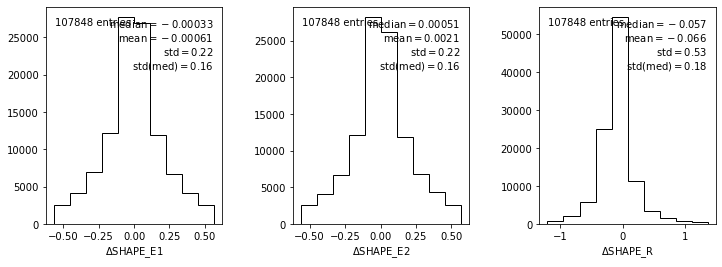

In [76]:
fields = ['SHAPE_E1','SHAPE_E2','SHAPE_R']
ncols,nrows = 3,1
fig,lax = plt.subplots(ncols=ncols,nrows=nrows,sharex=False,sharey=False,figsize=(4*ncols,4*nrows))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
lax = lax.flatten()

mask = legacysim['MATCHED']
#mask = legacysim['MATCHED'] & (legacysim['TYPE'] != 'PSF') & (legacysim['INPUT_SHAPE_R'] > 0.)
#mask = legacysim['MATCHED'] & (legacysim['SHAPE_R'] > 0.) & (legacysim['INPUT_SHAPE_R'] > 0.)

for ax,field in zip(lax,fields):
    plot_hist(ax,legacysim,field,mask=mask,kwargs_xedges={'quantiles':[0.01,0.99]},divide_uncer=False)

In [78]:
mask_psf = mask & (legacysim['INPUT_SHAPE_R'] == 0.)
print(np.sum(mask_psf & (legacysim['SHAPE_R'] == 0.))*1./mask_psf.sum())
mask_nonpsf = mask & (legacysim['INPUT_SHAPE_R'] > 0.)
print(np.sum(mask_nonpsf & (legacysim['SHAPE_R'] > 0.))*1./mask_nonpsf.sum())

0.8765586034912718
6.8802992518703245


(array([1.2178e+04, 6.8000e+01, 2.3340e+03, 9.1330e+03, 8.2410e+03,
        7.8670e+03, 8.0190e+03, 7.7680e+03, 7.6700e+03, 7.3810e+03,
        6.8670e+03, 6.2890e+03, 5.4880e+03, 4.5690e+03, 4.0750e+03,
        3.4660e+03, 3.0470e+03, 2.5410e+03, 2.0690e+03, 1.8470e+03,
        1.6190e+03, 1.4380e+03, 1.1330e+03, 1.0280e+03, 7.5400e+02,
        7.4300e+02, 6.2900e+02, 5.8300e+02, 4.3700e+02, 3.9500e+02,
        3.7300e+02, 2.8200e+02, 2.5600e+02, 2.9400e+02, 2.1900e+02,
        1.9700e+02, 1.3600e+02, 1.8800e+02, 1.2200e+02, 8.5000e+01,
        1.3500e+02, 1.0900e+02, 9.9000e+01, 9.0000e+01, 8.2000e+01,
        4.6000e+01, 5.2000e+01, 6.5000e+01, 3.6000e+01, 4.1000e+01,
        4.9000e+01, 4.0000e+01, 3.1000e+01, 3.5000e+01, 2.9000e+01,
        4.1000e+01, 4.0000e+01, 2.7000e+01, 2.4000e+01, 2.5000e+01,
        9.0000e+00, 2.4000e+01, 1.4000e+01, 2.4000e+01, 1.8000e+01,
        1.8000e+01, 1.5000e+01, 1.4000e+01, 2.0000e+01, 1.6000e+01,
        2.0000e+00, 1.6000e+01, 8.0000e+00, 7.00

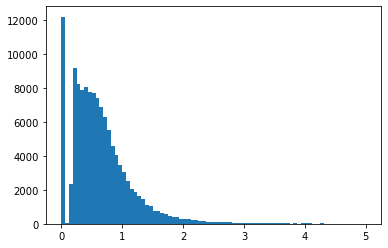

In [84]:
plt.hist(legacysim['INPUT_SHAPE_R'],bins=80)